In [1]:
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

# Intro to Regression

A popular classification model is [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression). This is what Underwood and Sellers use in their article to classify whether a text was reviewed or randomly selected from HathiTrust. Today we'll look at the difference between regression and classification tasks, and how we can use a logistic regression model to classify text like Underwood and Sellers. We won't have time to go through their full code, but if you're interested I've provided a walk-through in the second notebook.

To explore the regression model let's first create some dummy data:

In [2]:
demo_tb = Table()
demo_tb['Study_Hours'] = [2.0, 6.9, 1.6, 7.8, 3.1, 5.8, 3.4, 8.5, 6.7, 1.6, 8.6, 3.4, 9.4, 5.6, 9.6, 3.2, 3.5, 5.9, 9.7, 6.5]
demo_tb['Grade'] = [67.0, 83.6, 35.4, 79.2, 42.4, 98.2, 67.6, 84.0, 93.8, 64.4, 100.0, 61.6, 100.0, 98.4, 98.4, 41.8, 72.0, 48.6, 90.8, 100.0]
demo_tb['Pass'] = [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
demo_tb.show()

Study_Hours,Grade,Pass
2,67,0
6.9,83.6,1
1.6,35.4,0
7.8,79.2,1
3.1,42.4,0
5.8,98.2,1
3.4,67.6,0
8.5,84,1
6.7,93.8,1
1.6,64.4,0


In [11]:
types = make_array(40, 120, 300)
numbers = make_array(1, 2, 3)

fish = Table().with_columns(
    'weight', types,
    'rank', numbers)

## Intuiting the Linear Regression Model

You may have encountered linear regression in previous coursework of yours. Linear regression, in its simple form, tries to model the relationship between two continous variables as a straight line. It interprets one variable as the input, and the other as the output.:

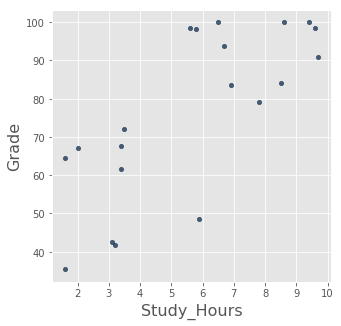

In [12]:
demo_tb.scatter('Study_Hours','Grade')

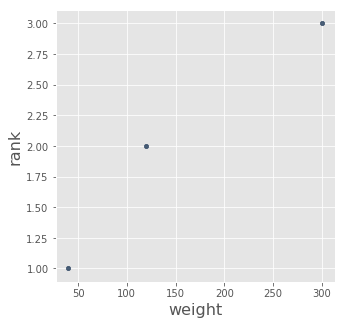

In [16]:
fish.scatter('weight', 'rank')

In the example above, we're interested in `Study_Hours` and `Grade`. This is a natural "input" "output" situation. To plot the regression line, or ***best-fit***, we can feed in `fit_line=True` to the `scatter` method:

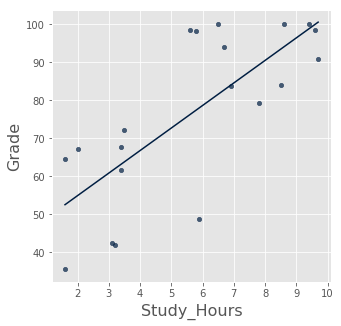

In [4]:
demo_tb.scatter('Study_Hours','Grade', fit_line=True)

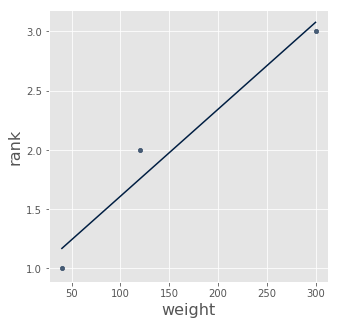

In [17]:
fish.scatter('weight', 'rank', fit_line=True)

The better this line fits the points, the better we can predict one's `Grade` based on their `Study_Hours`, even if we've never seen anyone put in that number of study hours before.

The regression model above can be expressed as:

$GRADE_i= \alpha + \beta STUDYHOURS + \epsilon_i$

The variable we want to predict (or model) is the left side `y` variable, here `GRADE`. The variable which we think has an influence on our left side variable is on the right side, the independent variable `STUDYHOURS`. The $\alpha$ term is the y-intercept and the $\epsilon_i$ describes the randomness.

The $\beta$ coefficient on `STUDYHOURS` gives us the slope, in a univariate regression. That's the factor on `STUDYHOURS` to get `GRADE`.

If we want to build a model for the regression, we can use the `sklearn` library. `sklearn` is by far the most popular machine learning library for Python, and its syntax is really important to learn. In the next cell we'll import the [`Linear Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model and assign it to a `linreg` variable:

In [5]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

Before we go any further, `sklearn` likes our data in a very specific format. The `X` must be in an array of arrays, each sub array is an observation. Because we only have one independent variable, we'll have sub arrays of `len` 1. We can do that with the `reshape` method:

In [30]:
X = demo_tb['Study_Hours'].reshape(-1,1)
X

array([[ 2. ],
       [ 6.9],
       [ 1.6],
       [ 7.8],
       [ 3.1],
       [ 5.8],
       [ 3.4],
       [ 8.5],
       [ 6.7],
       [ 1.6],
       [ 8.6],
       [ 3.4],
       [ 9.4],
       [ 5.6],
       [ 9.6],
       [ 3.2],
       [ 3.5],
       [ 5.9],
       [ 9.7],
       [ 6.5]])

In [31]:
fishx = fish.column('weight').reshape(-1, 1)
fishy = fish.column('rank').reshape(-1, 1)

Your output, or dependent variable, is just one array with no sub arrays.

In [32]:
y = demo_tb['Grade'].reshape(len(demo_tb['Grade']),)
y

array([  67. ,   83.6,   35.4,   79.2,   42.4,   98.2,   67.6,   84. ,
         93.8,   64.4,  100. ,   61.6,  100. ,   98.4,   98.4,   41.8,
         72. ,   48.6,   90.8,  100. ])

We then use the `fit` method to fit the model. This happens in-place, so we don't have to reassign the variable:

In [42]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
linreg.fit(fishx, fishy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can get back the `intercept_` and $\beta$ `coef_` with attributes of the `linreg` object:

In [44]:
B0, B1 = linreg.intercept_, linreg.coef_[0]
B0, B1

(array([ 0.87593985]), array([ 0.00733083]))

In [47]:
intercept, coefficient = linreg.intercept_, linreg.coef_[0]
intercept, coefficient

(array([ 0.87593985]), array([ 0.00733083]))

So this means:

$GRADE_i= 42.897229302892598 + 5.9331153718275509 * STUDYHOURS + \epsilon_i$

As a linear regression this is simple to interpret. To get our grade score, we take the number of study hours and multipy it by 5.9331153718275509 then we add 42.897229302892598 and that's our prediction.

If we look at our chart again but using the model we just made, that looks about right:

[[ 2. ]
 [ 6.9]
 [ 1.6]
 [ 7.8]
 [ 3.1]
 [ 5.8]
 [ 3.4]
 [ 8.5]
 [ 6.7]
 [ 1.6]
 [ 8.6]
 [ 3.4]
 [ 9.4]
 [ 5.6]
 [ 9.6]
 [ 3.2]
 [ 3.5]
 [ 5.9]
 [ 9.7]
 [ 6.5]]
[  54.76346005   83.83572537   52.3902139    89.1755292    61.28988696
   77.30929846   63.06982157   93.32870996   82.64910229   52.3902139
   93.9220215    63.06982157   98.6685138    76.12267539   99.85513687
   61.88319849   63.6631331    77.90261     100.44844841   81.46247922]


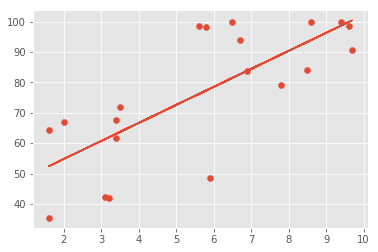

In [11]:
y_pred = linreg.predict(X)
print(X)
print(y_pred)
plt.scatter(X, y)
plt.plot(X, y_pred)

[[ 40]
 [120]
 [300]]
[[ 1.16917293]
 [ 1.7556391 ]
 [ 3.07518797]]


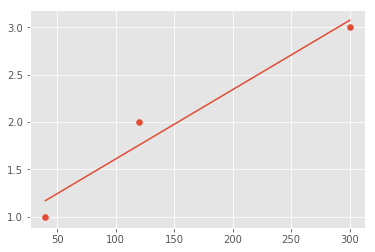

In [50]:
fishy_pred = linreg.predict(fishx)
print(fishx)
print(fishy_pred)
plt.scatter(fishx, fishy)
plt.plot(fishx, fishy_pred)

We can evaluate how great our model is with the `score` method. We need to give it the `X` and observed `y` values, and it will predict its own `y` values and compare:

In [12]:
linreg.score(X, y)

0.55865744244266069

For the Linear Regression, `sklearn` returns an **R-squared** from the `score` method. The R-squared tells us how much of the variation in the data can be explained by our model, .559 isn't that bad, but obviously more goes into your `Grade` than *just* `Study_Hours`.

Nevertheless we can still predict a grade just like we did above to create that line, let's say I studied for 5 hours:

In [51]:
linreg.predict([[200]])

array([[ 2.34210526]])

Maybe I should study more?

In [52]:
linreg.predict([[20]])

array([[ 1.02255639]])

Wow! I rocked it.

## Intuiting the Logistic Regression Model

But what happens if one of your variables is categorical, and not continuous? Suppose we don't care about the `Grade` score, but we just care if you `Pass` or not:

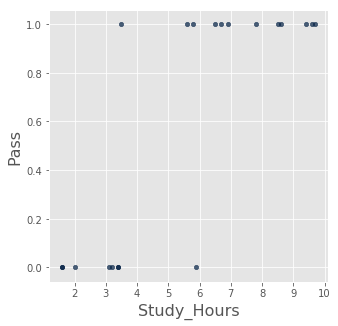

In [59]:
demo_tb.scatter('Study_Hours','Pass')

How would we fit a line to that? That's where the [logistic function](https://en.wikipedia.org/wiki/Logistic_function) can be handy. The general logistic function is:

$ f(x) = \frac{1}{1 + e^{-x}} $

We can translate that to Python:

In [60]:
def logistic(p):
    return 1 / (1 + np.exp(-p))

We'll also need to assign a couple $\beta$ coefficients for the intercept and variable just like we saw in linear regression:

In [61]:
B0, B1 = 0, 1

Let's plot the logistic curve:

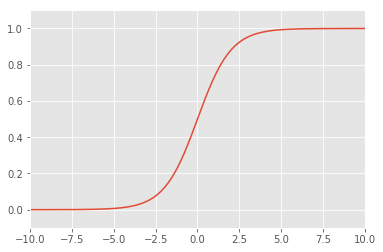

In [62]:
xmin, xmax = -10,10
xlist = [float(x)/int(1e4) for x in range(xmin*int(1e4), xmax*int(1e4))]  # just a lot of points on the x-axis
ylist = [logistic(B0 + B1*x) for x in xlist]

plt.axis([-10, 10, -0.1,1.1])
plt.plot(xlist,ylist)

When things get complicated, however, with several independent variables, we don't want to write our own code. Someone has done that for us. We'll go back to `sklearn`.

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

We'll `reshape` our arrays again too, since we know how `sklearn` likes them:

In [64]:
X = demo_tb['Study_Hours'].reshape(-1,1)
y = demo_tb['Pass'].reshape(len(demo_tb['Pass']),)
X, y

(array([[ 2. ],
        [ 6.9],
        [ 1.6],
        [ 7.8],
        [ 3.1],
        [ 5.8],
        [ 3.4],
        [ 8.5],
        [ 6.7],
        [ 1.6],
        [ 8.6],
        [ 3.4],
        [ 9.4],
        [ 5.6],
        [ 9.6],
        [ 3.2],
        [ 3.5],
        [ 5.9],
        [ 9.7],
        [ 6.5]]),
 array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]))

We can use the `fit` function again on our `X` and `y`:

In [65]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can get those $\beta$ coefficients back out from `sklearn` for our grade data:

In [66]:
B0, B1 = lr.intercept_[0], lr.coef_[0][0]
B0, B1

(-1.5424918505481691, 0.4479077707825187)

Then we can plot the curve just like we did earlier, and we'll add our points:

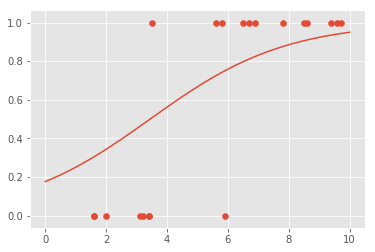

In [67]:
xmin, xmax = 0,10
xlist = [float(x)/int(1e4) for x in range(xmin*int(1e4), xmax*int(1e4))]
ylist = [logistic(B0 + B1*x) for x in xlist]
plt.plot(xlist,ylist)

# add our "observed" data points
plt.scatter(demo_tb['Study_Hours'],demo_tb['Pass'])

How might this curve be used for a binary classification task?

- This curve could be used easily for a binary classification, with some category being above the line, and some other category being below the line. 

In [72]:
demo_tb.column('Study_Hours')[-2:]

array([ 9.7,  6.5])

## Logistic Classification

That's great, so we can begin to see how we might use such a model to conduct binary classification. In this task, we want to get a number of study hours as an observation, and place it in one of two bins: pass or fail.

To create the model though, we have to train it on the data we have. [In machine learning, we also need to put some data aside as "testing data" so that we don't bias our model by using it in the training process.](https://en.wikipedia.org/wiki/Training,_test,_and_validation_sets) In Python we often see `X_train`, `y_train` and `X_test`, `y_test`:

In [75]:
X_train = demo_tb.column('Study_Hours')[:-2]
y_train = demo_tb.column('Pass')[:-2]

X_test = demo_tb.column('Study_Hours')[-2:]
y_test = demo_tb.column('Pass')[-2:]

Let's see the observations we're setting aside for later:

In [76]:
print(X_test, y_test)

[ 9.7  6.5] [1 1]


Now we'll fit our model again but only on the `_train` data, and get out the $\beta$ coefficients:

In [77]:
lr.fit(X_train.reshape(-1,1),y_train.reshape(len(y_train),))
B0, B1 = lr.intercept_[0], lr.coef_[0]

We can send these coefficients back into the `logistic` function we wrote earlier to get the probability that a student would pass given our `X_test` values:

In [78]:
fitted = [logistic(B1*th + B0) for th in X_test]
fitted

[array([ 0.92799213]), array([ 0.77156743])]

We can take the probability and change this to a binary outcome based on probability `>` or `<` .5:

In [79]:
prediction = [pred >.5 for pred in fitted]
prediction

[array([ True], dtype=bool), array([ True], dtype=bool)]

The `sklearn` built-in methods can make this `predict` process faster:

In [81]:
lr.predict(X_test.reshape(-1, 1)) # How does it make the predict process faster? 

array([1, 1])

To see how accurate our model is, we'd predict on the "unseen" `_test`ing data and see how many we got correct. In this case there's only two, so not a whole lot to test with:

In [82]:
prediction_eval = [prediction[i]==y_test[i] for i in range(len(prediction))]
float(sum(prediction_eval)/len(prediction_eval))

1.0

We can do this quickly in `sklearn` too with the `score` method like in the linear regression example:

In [84]:
## DO THIS ONE 

lr.score(X_test.reshape(-1, 1), y_test.reshape(len(y_test),))

1.0

---

# Classification of Textual Data

How can we translate this simple model of binary classification to text? I'm going to leave the more complicated model that Underwood and Sellers use for the next notebook if you're interested, today we're just going to work through the basic classfication pipeline. We'll download a pre-made corpus from `nltk`:

In [85]:
import nltk
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to /srv/app/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

Now we import the `movie_reviews` object:

In [86]:
from nltk.corpus import movie_reviews

As you might expect, this is a corpus of IMDB movie reviews. Someone went through and read each review, labeling it as either "positive" or "negative". The task we have before us is to create a model that can accurately predict whether a never-before-seen review is positive or negative. This is analogous to Underwood and Sellers looking at whether a poem volume was reviewed or randomly selected.

From the `movie_reviews` object let's take out the reviews and the judgement:

In [87]:
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
judgements = [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]

Let's read the first review:

In [35]:
print(reviews[0])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

Do you consider this a positive or negative review? Let's see what the human annotator said:

In [88]:
print(judgements[0])

neg


So right now we have a list of movie reviews in the `reviews` variable and a list of their corresponding judgements in the `judgements` variable. Awesome. What does this sound like to you? Independent and dependent variables? You'd be right!

`reviews` is our `X` array from above. `judgements` is our `y` array from above. Let's first reassign our `X` and `y` so we're explicit about what's going on. While we're at it, we're going to set the random `seed` for our computer. This just makes our result reproducible. We'll also `shuffle` so that we randomize the order of our observations, and when we split the testing and training data it won't be in a biased order:

In [91]:
np.random.seed?

In [92]:
from sklearn.utils import shuffle

# What? Random seed what does it do? 
#Seed the generator.

#This method is called when `RandomState` is initialized. It can be
#called again to re-seed the generator. For details, see `RandomState`.


np.random.seed(1)

X, y = shuffle(reviews, judgements, random_state=0)

If you don't believe me that all we did is reassign and shuffle:

In [93]:
X[0], y[0]

("arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

To get meaningful independent variables (words) we have to do some processing too (think DTM!). With `sklearn`'s text pipelines, we can quickly build a text a classifier in only a few lines of Python: 

In [94]:
## HERE

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(random_state=0))
                     ])

scores = cross_val_score(text_clf, X, y, cv=5)

print(scores, np.mean(scores))

[ 0.825   0.805   0.7875  0.8275  0.7825] 0.8055


***Whoa! What just happened?!?*** The pipeline tells us three things happened:

1. `CountVectorizer`

2. `TfidfTransformer`

3. `LogisticRegression`

Let's walk through this step by step.

1. A count vectorizer does exactly what we did last week with tokenization. It changes all the texts to words, and then simply counts the frequency of each word occuring in the corpus for each document. The feature array for each document at this point is simply the length of all unique words in a corpus, with the count for the frequency of each. This is the most basic way to provide features for a classifier---a document term matrix.

2. [tfidf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) (term frequency inverse document frequency) is an algorithm that aims to find words that are important to specific documents. It does this by taking the term frequency (tf) for a specific term in a specific document, and multiplying it by the term's inverse document frequency (idf), which is the total number of documents divided by the number of documents that contain the term at least once. Thus, idf is defined as:

$$idf(t, d, D)= log\left(\frac{\mid D \mid}{\mid \{d \subset D : t \subset d \} \mid}\right )$$

So tfidf is simply:

$$tfidf(t, d, D)= f_{t,d}*log\left(\frac{\mid D \mid}{\mid \{d \subset D : t \subset d \} \mid}\right )$$

A tfidf value is calculated for each term for each document. The feature arrays for a document is now the tfidf values. ***The tfidf matrix is the exact same as our document term matrix, only now the values have been weighted according to their distribution across documents.***

The pipeline now sends these tfidf feature arrays to a 3. **Logistic Regression**, what we learned above. The independent variables are the tfidf values of each word. In a simple linear model, that would look like:

$$log(CLASSIFICATION_i)= \alpha + \beta DOG + \beta RABBIT + \beta JUMP + ... + \epsilon_i$$

where $\beta DOG$ is the model's $\beta$ coefficient multiplied by the ***tfidf*** value for "dog".

The code below breaks this down by each step, but combines the `CountVectorizer` and `TfidfTransformer` in the `TfidfVectorizer`.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# get tfidf values
tfidf = TfidfVectorizer()
tfidf.fit(X)
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

# build and test logit
logit_class = LogisticRegression()
model = logit_class.fit(X_train, y_train)
model.score(X_test, y_test)

0.83250000000000002

The concise code we first ran actually uses "cross validation", where we split up testing and training data `k` number of times and average our score on all of them. This is a more reliable metric than just testing the accuracy once. It's possible that you're random train/test split just didn't provide a good split, so averaging it over multiple splits is preferred.

You'll also notice the `ngram_range` parameter in the `CountVectorizer` in the first cell. This expands our vocabulary document term matrix by including groups of words together. It's easier to understand an [ngram](https://en.wikipedia.org/wiki/N-gram) by just seeing one. We'll look at a bigram (bi is for 2):

In [96]:
from nltk.util import ngrams

ngs = ngrams("Text analysis is so cool. I can really see why classification can be a valuable tool.".split(), 2)
list(ngs)

[('Text', 'analysis'),
 ('analysis', 'is'),
 ('is', 'so'),
 ('so', 'cool.'),
 ('cool.', 'I'),
 ('I', 'can'),
 ('can', 'really'),
 ('really', 'see'),
 ('see', 'why'),
 ('why', 'classification'),
 ('classification', 'can'),
 ('can', 'be'),
 ('be', 'a'),
 ('a', 'valuable'),
 ('valuable', 'tool.')]

Trigram:

In [97]:
ngs = ngrams("Text analysis is so cool. I can really see why classification can be a valuable tool.".split(), 3)
list(ngs)

[('Text', 'analysis', 'is'),
 ('analysis', 'is', 'so'),
 ('is', 'so', 'cool.'),
 ('so', 'cool.', 'I'),
 ('cool.', 'I', 'can'),
 ('I', 'can', 'really'),
 ('can', 'really', 'see'),
 ('really', 'see', 'why'),
 ('see', 'why', 'classification'),
 ('why', 'classification', 'can'),
 ('classification', 'can', 'be'),
 ('can', 'be', 'a'),
 ('be', 'a', 'valuable'),
 ('a', 'valuable', 'tool.')]

You get the point. This helps us combat this "bag of words" idea, but doesn't completely save us. For our purposes here, just as we counted the frequency of individual words, we've added counting the frequency of groups of 2s and 3s.

---

### Important Features

After we train the model we can then index the tfidf matrix for the words with the most significant coefficients (remember independent variables!) to get the most helpful features:

In [98]:
feature_names = tfidf.get_feature_names()
top10pos = np.argsort(model.coef_[0])[-10:]
print("Top features for positive reviews:")
print(list(feature_names[j] for j in top10pos))
print()
print("Top features for negative reviews:")
top10neg = np.argsort(model.coef_[0])[:10]
print(list(feature_names[j] for j in top10neg))

Top features for positive reviews:
['truman', 'he', 'his', 'very', 'the', 'great', 'life', 'as', 'is', 'and']

Top features for negative reviews:
['bad', 'have', 'worst', 'plot', 'no', 'there', 'nothing', 'boring', 'to', 'movie']


### Prediction

We can also use our model to classify new reviews, all we have to do is extract the tfidf features from the raw text and send them to the model as our features (independent variables):

In [99]:
new_bad_review = "This movie really sucked. I can't believe how long it dragged on. The actors are absolutely terrible. They should rethink their career paths"

features = tfidf.transform([new_bad_review])

model.predict(features)

array(['neg'], 
      dtype='<U3')

In [100]:
new_good_review = "I loved this film! The cinematography was incredible, and Leonardo Dicarpio is flawless. Super cute BTW."

features = tfidf.transform([new_good_review])

model.predict(features)

array(['pos'], 
      dtype='<U3')

# Homework

Let's examine more the three objects in the pipeline:

In [101]:
CountVectorizer?

In [102]:
TfidfTransformer?

In [103]:
LogisticRegression?

I've copied the cell from above below. Try playing with the parameters to these objects and see if you can improve the `cross_val_score` for the model.

In [104]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(random_state=0))
                     ])

scores = cross_val_score(text_clf, X, y, cv=5)

print(scores, np.mean(scores))

[ 0.825   0.805   0.7875  0.8275  0.7825] 0.8055


In [108]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(random_state=0))
                     ])

scores = cross_val_score(text_clf, X, y, cv=5)

print(scores, np.mean(scores))

[ 0.8575  0.8125  0.8075  0.8275  0.82  ] 0.825


In [107]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(random_state=0))
                     ])

scores = cross_val_score(text_clf, X, y, cv=7)

print(scores, np.mean(scores))

[ 0.81118881  0.84615385  0.77272727  0.81118881  0.82167832  0.8006993
  0.81338028] 0.811002377904


Why do you think your score improved (or didn't)?

- For the first attempt, I changed the ngram_range from (1, 2) to (1, 3). This had an effect of lowering all of the cross_val_scores. I don't think that this created an "improvement" in the score because by increasing the ngram_range, I essentially made the algorithm less accurate in its classification efforts. 
- For the second attempt, I changed the cv from (5) to (7). This increased the mean of the scores because changing the cv attribute means to change the cross-validation splitting strategy, specifying the number of folds. by increasing the folds, we're essentially increasing the extent to which the algorithm sticks to the scores. 

In [113]:
CountVectorizer? #ngram_range : tuple (min_n, max_n)
    #The lower and upper boundary of the range of n-values for different
    #n-grams to be extracted. All values of n such that min_n <= n <= max_n
   # will be used.


In [118]:
cross_val_score?

---

# BONUS (not assigned)

We're going to download the [20 Newsgroups](http://qwone.com/~jason/20Newsgroups/), a widely used corpus for demos of general texts:

> The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of my knowledge, it was originally collected by Ken Lang, probably for his Newsweeder: Learning to filter netnews paper, though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

First we'll import the data from `sklearn`:

In [50]:
from sklearn.datasets import fetch_20newsgroups

Let's see what categories they have:

In [51]:
fetch_20newsgroups(subset="train").target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

The `subset` parameter will give you training and testing data. You can also use the `categories` parameter to choose only certain categories.

If we wanted to get the training data for `sci.electronics` and `rec.autos` we would write this:

In [52]:
train = fetch_20newsgroups(subset="train", categories=['sci.electronics', 'rec.autos'])

The list of documents (strings) is in the `.data` property, we can access the first one like so:

In [53]:
train.data[0]

'From: Sang-Yoon Oh <so0z+@andrew.cmu.edu>\nSubject: Re: Jeep Grand vs. Toyota 4-Runner\nOrganization: Junior, Mechanical Engineering, Carnegie Mellon, Pittsburgh, PA\nLines: 29\n\t<C51Hn0.2JI@world.std.com>\nNNTP-Posting-Host: po2.andrew.cmu.edu\nIn-Reply-To: <C51Hn0.2JI@world.std.com>\n\n>In article <1pq29p$29p@seven-up.East.Sun.COM>\njfox@hooksett.East.Sun.COM >writes:\n>>\n>>Any reason you are limited to the two mentioned? They aren\'t really at\n>>the same point along the SUV spectrum - not to mention price range.\n>>How about the Explorer, Trooper, Blazer, Montero, and if the budget\n>>allows, the Land Cruiser? \n> \n>Any advice on HOW to buy a Land Cruiser? My local Toyota dealer says they\n>get two a year, and if I want one I can just get on the waiting list.\n>Forget about a test drive or even kicking the tires.\n>And if they are that rare, I doubt there is much of a parts inventory on\nhand.\n\nLand Crusier is just simply nice with shit-load of power and room.\nFully stocked,

And here is the assigment category:

In [54]:
train.target[0]

0

How many training documents are there?

In [55]:
len(train.data)

1185

We can do the same for the testing data:

In [56]:
test = fetch_20newsgroups(subset="test", categories=['sci.electronics', 'rec.autos'])
test.data[0]

"From: singer@ll.mit.edu (Matthew R. Singer)\nSubject: Opel-GT\nArticle-I.D.: ll.1993Apr21.171023.12936\nReply-To: singer@ll.mit.edu (Matthew R. Singer)\nOrganization: MIT Lincoln Laboratory\nLines: 11\n\n\n--\n\nAre the any Opel GT's out there? I'm wondering if there are enough to\nstarting a mail list...\n\n----------------------------------------------------------------------------\nMatthew R. Singer                                    MIT Lincoln Laboratory\n(617) 981-3771                                       244 Wood Street\nsinger@ll.mit.edu                                    Lexington, MA 02173\n-----------------------------------------------------------------------------\n"

In [57]:
test.target[0]

0

In [58]:
len(test.data)

789

You now have your four lists:

- `train.data` = `X_train` list of strings
- `train.target` = `y_train` list of category assignments
- `test.data` = `X_test` list of strings
- `test.target` = `y_test` list of category assignments

Build a classifier below. And then choose different categories and rebuild it. Which categories are easier to classify from each other? Why?

***TIP***: Don't forget to `shuffle` your data!